# Numpy урок


---

### Завдання:

[1. Завантаження данних;](#1)<br>
[2. Знайдіть target у наборі даних і видаліть цей стовпець з набору даних (видалення за індексом)**;](#2)<br>
[3. Перетворіть решту стовпців у двовимірний масив (або переконайтеся, що це вже двовимірний масив);](#3)<br>
[4. Обчислити середнє, медіану, стандартне відхилення для 1-го стовпчика;](#4)<br>
[5. Вставити 20 значень np.nan у випадкові позиції масиву (при використанні звичайної рандомізації можливі перекриття позицій, тому знайдіть розв'язок, який гарантує 20 унікальних позицій);](#5)<br>
[6. Знайдіть позиції вставлених значень np.nan у 1-му стовпчику;](#6)<br>
[7. Відфільтрувати масив за умовою: значення в 3-му стовпчику > 1.5 і значення в 1-му стовпчику < 5.0 (зберегти в іншу змінну);](#7)<br>
[8. Замінити всі значення np.nan на 0;](#8)<br>
[9. Підрахувати всі унікальні значення в масиві і вивести їх разом з номером;](#9)<br>
[10. Розділіть масив по горизонталі на 2 рівні частини (не використовуйте абсолютні числа, повинно бути два масиви по 4 стовпці);](#10)<br>
[11. Відсортувати обидва масиви за 1-м стовпчиком: 1-й за зростанням, 2-й за спаданням;](#11)<br>
[12. Об'єднати обидва масиви в один;](#12)<br>
[13. Знайти значення, що найчастіше повторюється в масиві;](#13)<br>
[14. Напишіть функцію, яка множить усі значення у стовпчику, менші за середнє значення у цьому стовпчику, на 2, а решту значень ділить на 4;](#14)<br>
[15. Застосуйте отриману функцію до 3-го стовпчика.](#15)

### Додатково. Статисткика в Numpy

[16. Статистичні методи](#16)<br>
[17. Генерація нормальної вибірки](#17)<br>
[18. Росподіл Вейбула(Weibull)](#18)<br>
[19. Росподіл Пуассона (Poisson)](#19)<br>
[20. Біномінальний росподіл(Binomial)](#20)

Іморт бібліотек

In [4]:
import numpy as np

---

# Рішення

---

### 1. Завантаження данних
([завдання](#Numpy-урок))
<a name="1"/>

In [1]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [7]:
data = np.loadtxt(url, delimiter=',', dtype=object)

In [13]:
data[0]

array(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype=object)

---

### 2. Знайдіть target у наборі даних і видаліть цей стовпець з набору даних (видалення за індексом)**
([завдання](#Numpy-урок))
<a name="2"/>

In [10]:
arr = np.delete(data, 4, 1)

In [12]:
arr[0]

array(['5.1', '3.5', '1.4', '0.2'], dtype=object)

In [15]:
# перетворення типу данних на float
arr = arr.astype('float16')

In [17]:
arr[0]

array([5.1, 3.5, 1.4, 0.2], dtype=float16)

---

### 3. Перетворіть решту стовпців у двовимірний масив (або переконайтеся, що це вже двовимірний масив)
([завдання](#Numpy-урок))
<a name="3"/>

In [22]:
if arr.ndim == 2:
  print('OK')
elif arr.ndim != 2:
  print('Массив не двовимірний!')
else:
  print("Все погано(")

OK


---

### 4. Обчислити середнє, медіану, стандартне відхилення для 1-го стовпчика
([завдання](#Numpy-урок))
<a name="4"/>

In [24]:
mean_arr_1st_column = np.mean(arr[:,0])
median_arr_1st_column = np.median(arr[:,0])
std_arr_1st_column = np.std(arr[:,0])

print('Значення першого стовбчика:')
print('Середнє: ', mean_arr_1st_column)
print('Медіана: ', median_arr_1st_column)
print('SСтандартне відхилення: ', std_arr_1st_column)

Значення першого стовбчика:
Середнє:  5.844
Медіана:  5.8
SСтандартне відхилення:  0.825


---

### 5. Вставити 20 значень np.nan у випадкові позиції масиву (при використанні звичайної рандомізації можливі перекриття позицій, тому знайдіть розв'язок, який гарантує 20 унікальних позицій)
([завдання](#Numpy-урок))
<a name="5"/>

In [26]:
np.random.seed(42)

# отримати унікальні випадкові координати для стовпця та неунікальні координати для рядка.
a = np.random.choice(arr.shape[0], 20, replace=False)
b = np.random.choice(arr.shape[1], 20)
c = np.vstack((a,b))

# Заміна елементів за родндомно-визначеними координатами на 'nan'
arr[c[0], c[1]] = np.nan

arr

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, nan],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , nan, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, nan, 0.3],
       [5.1, nan, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [nan, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

---

### 6. Знайдіть позиції вставлених значень np.nan у 1-му стовпчику
([завдання](#Numpy-урок))
<a name="6"/>

In [28]:
# Отримання таблиці, в якій nan буде позначено як True
get_nan_tf_array_1st_column = np.isnan(arr[:,0])
print(get_nan_tf_array_1st_column)

# Отримати список координат True
get_nan_index_1st_column = np.where(get_nan_tf_array_1st_column == True)
get_nan_index_1st_column = get_nan_index_1st_column[0]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
  True False False False False False False False False  True False False
 False False False False False False]


---

### 7. Відфільтрувати масив за умовою: значення в 3-му стовпчику > 1.5 і значення в 1-му стовпчику < 5.0 (зберегти в іншу змінну)
([завдання](#Numpy-урок))
<a name="7"/>

In [29]:
filter_arr = arr[(arr[:,0] < 5 ) & (arr[:,2] > 1.5)]

filter_arr

array([[4.8, 3.4, 1.6, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [4.9, 2.4, 3.3, 1. ],
       [4.9, 2.5, 4.5, 1.7]], dtype=float16)

---

### 8. Замінити всі значення np.nan на 0
([завдання](#Numpy-урок))
<a name="8"/>

In [30]:
# Знаходження всіх значень np.nan
missing_bool = np.isnan(arr)

# Заміна значень np.nan на 0
arr[missing_bool] = 0

arr

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0. ],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 0. , 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 0. , 0.3],
       [5.1, 0. , 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [0. , 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

---

### 9. Підрахувати всі унікальні значення в масиві і вивести їх разом з номером
([завдання](#Numpy-урок))
<a name="9"/>

In [31]:
unique_values = np.unique(arr, return_counts=True)

unique_values

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
        1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
        2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
        4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
        5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
        6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9], dtype=float16),
 array([20,  5, 28,  7,  7,  1,  1,  8,  4,  7, 19, 19, 25, 11,  5, 12,  7,
         7,  6,  6, 12,  6, 10,  5,  9, 14, 10, 27, 12, 13,  7, 12,  7,  4,
         4,  6,  4,  6,  4,  5,  3,  8,  8,  7,  6,  8, 11, 14, 16,  6,  3,
         7, 10, 12, 10, 10,  5,  8,  9,  4, 10,  7,  4,  3, 10,  3,  4,  1,
         1,  3,  1,  1,  1,  3,  1], dtype=int64))

---

### 10. Розділіть масив по горизонталі на 2 рівні частини (не використовуйте абсолютні числа, повинно бути два масиви по 4 стовпці)
([завдання](#Numpy-урок))
<a name="10"/>

In [42]:
split_arr = np.array_split(arr, 2) # (Fixed!)

splited_1st_arr = split_arr[0]
splited_2d_arr = split_arr[1]

print(f'''Кількість частин массиву: {len(split_arr)}
Перша половина: {len(splited_1st_arr)}
Друга половина: {len(splited_2d_arr)}''')

Кількість частин массиву: 2
Перша половина: 75
Друга половина: 75


---

### 11. Відсортувати обидва масиви за 1-м стовпчиком: 1-й за зростанням, 2-й за спаданням
([завдання](#Numpy-урок))
<a name="11"/>

In [44]:
sortColumnIndex = 0

# Сортування від меншого до більшого
sort_splited_1st_arr = splited_1st_arr[splited_1st_arr[:, sortColumnIndex].argsort()]

# Сортування від більшого до меншого
sort_splited_2d_arr = splited_2d_arr[splited_2d_arr[:, sortColumnIndex].argsort()[::-1][:splited_2d_arr.shape[0]]]

#sort_splited_1st_arr
#sort_splited_2d_arr

---

### 12. Об'єднати обидва масиви в один
([завдання](#Numpy-урок))
<a name="12"/>

In [46]:
arr2 = np.concatenate([sort_splited_1st_arr, sort_splited_2d_arr], axis=0)

len(arr2)

150

---

### 13. Знайти значення, що найчастіше повторюється в масиві
([завдання](#Numpy-урок))
<a name="13"/>

In [47]:
unique_values_arr2, counts = np.unique(arr2, return_counts=True) # (Fixed!)
ind = np.argmax(counts) # (Fixed!)

print("Найпоширинеше значення: ", unique_values_arr2[ind])
print("Кількість повторень:", counts[ind])

Найпоширинеше значення:  0.2
Кількість повторень: 28


---

### 14. Напишіть функцію, яка множить усі значення у стовпчику, менші за середнє значення у цьому стовпчику, на 2, а решту значень ділить на 4
([завдання](#Numpy-урок))
<a name="14"/>

In [48]:
def multiply_divide(column):

  # Середнє значення стовпчика
  column_mean = np.mean(column)

  # Значення менше середнього
  less_mean_values = column < column_mean

  # Помноження меньшого значення на 2
  column[less_mean_values] = column[less_mean_values] * 2

  # Значення більше середнього
  large_mean_values = np.invert(less_mean_values)

  # Розділення більшого значення на 4
  column[large_mean_values] = column[large_mean_values] / 4

  return column

---

### 15. Застосуйте отриману функцію до 3-го стовпчика
([завдання](#Numpy-урок))
<a name="15"/>

In [50]:
arr2[:,2] = multiply_divide(arr2[:,2])

arr2

array([[0.  , 3.4 , 0.75, 0.4 ],
       [0.  , 2.8 , 2.25, 1.3 ],
       [4.3 , 3.  , 0.55, 0.1 ],
       [4.4 , 3.  , 0.65, 0.2 ],
       [4.4 , 2.9 , 0.7 , 0.2 ],
       [4.4 , 3.2 , 0.65, 0.2 ],
       [4.5 , 2.3 , 0.65, 0.3 ],
       [4.6 , 3.1 , 0.75, 0.2 ],
       [4.6 , 3.2 , 0.7 , 0.2 ],
       [4.6 , 3.4 , 0.7 , 0.3 ],
       [4.6 , 3.6 , 0.5 , 0.2 ],
       [4.7 , 3.2 , 0.65, 0.2 ],
       [4.7 , 3.2 , 0.8 , 0.2 ],
       [4.8 , 3.4 , 0.95, 0.2 ],
       [4.8 , 3.  , 0.7 , 0.3 ],
       [4.8 , 3.4 , 0.8 , 0.2 ],
       [4.8 , 3.1 , 0.8 , 0.2 ],
       [4.8 , 3.  , 0.  , 0.1 ],
       [4.9 , 3.1 , 0.75, 0.1 ],
       [4.9 , 3.1 , 0.75, 0.1 ],
       [4.9 , 2.4 , 1.65, 1.  ],
       [4.9 , 3.1 , 0.75, 0.  ],
       [4.9 , 3.  , 0.7 , 0.2 ],
       [5.  , 3.5 , 0.8 , 0.6 ],
       [5.  , 3.2 , 0.6 , 0.2 ],
       [5.  , 3.3 , 0.7 , 0.2 ],
       [5.  , 3.  , 0.8 , 0.2 ],
       [5.  , 3.4 , 0.8 , 0.4 ],
       [5.  , 3.5 , 0.65, 0.3 ],
       [5.  , 3.4 , 0.75, 0.2 ],
       [5.

---

### 16. Статистичні методи
([завдання](#Numpy-урок))
<a name="16"/>

In [52]:
# Процентіль
print('90% percentile: ', np.percentile(arr2, 90, axis=0))

# Квантілі
print('0.25 quantile: ', np.quantile(arr2, 0.25, axis=0))
print('0.5 quantile: ', np.quantile(arr2, 0.50, axis=0))
print('0.75 quantile:', np.quantile(arr2, 0.75, axis=0), '\n')

# Массив для гістограми
print('Histogram: ', np.histogram(arr2), '\n')

# стандартне відхилення
print('Standard Deviation: ', np.std(arr2, axis=0))

# Відхилення
print('Variance: ', np.var(arr2, axis=0))

# Середнє
print('Mean: ', np.mean(arr2, axis=0))

# Медіана
print('Median: ', np.median(arr2, axis=0))

# Мінімальне та максимальне значення
print('Min: ', np.amin(arr2, axis=0))
print('Max: ', np.amax(arr2, axis=0))

90% percentile:  [6.81054687 3.59960938 2.90039062 2.19921875]
0.25 quantile:  [5.02539062 2.80078125 0.75       0.30004883]
0.5 quantile:  [5.69921875 3.         2.09960938 1.29980469]
0.75 quantile: [6.37402344 3.30078125 2.55078125 1.79980469] 

Histogram:  (array([105,  59,  95, 140,  53,  15,  47,  48,  28,  10], dtype=int64), array([0.   , 0.79 , 1.58 , 2.37 , 3.16 , 3.95 , 4.74 , 5.527, 6.32 ,
       7.11 , 7.9  ], dtype=float16)) 

Standard Deviation:  [1.395  0.6484 0.952  0.774 ]
Variance:  [1.943  0.4207 0.9067 0.5986]
Mean:  [5.586 2.967 1.792 1.18 ]
Median:  [5.7 3.  2.1 1.3]
Min:  [0. 0. 0. 0.]
Max:  [7.9  4.4  3.45 2.5 ]


---

### 17. Генерація нормальної вибірки
([завдання](#Numpy-урок))
<a name="17"/>

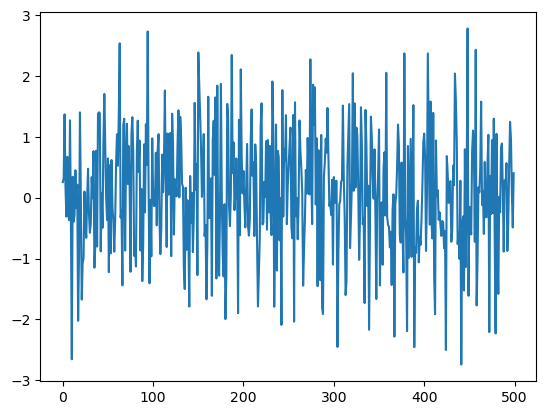

In [53]:
import matplotlib.pyplot as plt

normal_arr = np.random.normal(loc=0, scale=1, size=(500,))
plt.plot(normal_arr)

---

### 18. Росподіл Вейбула(Weibull)
([завдання](#Numpy-урок))
<a name="18"/>

(array([12., 26., 48., 77., 86., 98., 72., 58., 16.,  7.]),
 array([0.26103252, 0.39261256, 0.52419259, 0.65577263, 0.78735266,
        0.9189327 , 1.05051273, 1.18209277, 1.3136728 , 1.44525284,
        1.57683287]),
 <BarContainer object of 10 artists>)

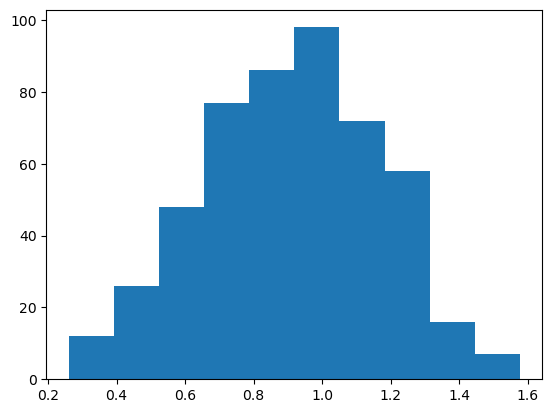

In [54]:
shape=4
weibull_arr = np.random.weibull(shape, 500)

plt.hist(weibull_arr)

---

### 19. Росподіл Пуассона (Poisson)
([завдання](#Numpy-урок))
<a name="19"/>

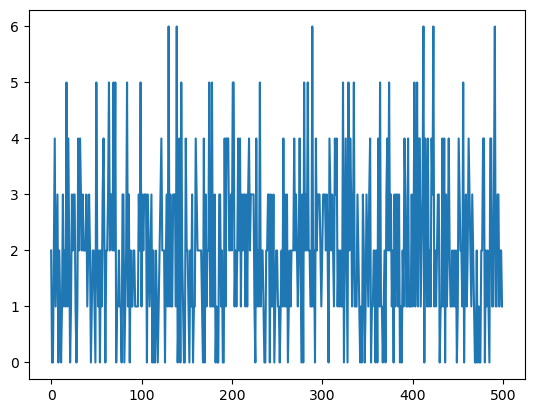

In [56]:
poisson_arr = np.random.poisson(2, 500)

plt.plot(poisson_arr)

---

### 20. Біномінальний росподіл(Binomial)
([завдання](#Numpy-урок))
<a name="20"/>

(array([  9.,  32.,  60.,  71.,  72., 124.,  17.,   8.,   1.,   6.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

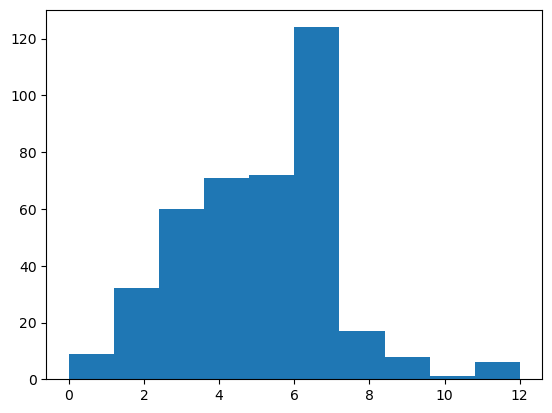

In [59]:
binomial_arr = np.random.binomial(25, 1/5, 400)

plt.hist(binomial_arr)

## Дякую за увагу=)